In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [110]:
df_4 = pd.read_csv("C:\\Users\\Kolade\\Documents\\Datasets\\pet_adoption for cleaning.csv")
df_4.tail()

,pet_id,pet_name,species,breed,age_years,gender,color,arrival_date,adopted,adoption_date,adopter_id,adopter_name,adopter_age,adopter_city,adopter_previous_pets,Unnamed: 15
195,P0196,Melissa,Hamster,Chinese,8,Male,White,11/10/2024,False,11/28/2024,NaN,NaN,-1,NaN,0,NaN
196,P0197,Ricky,Dog,Labrador Retriever,4,Female,Golden,4/9/2025,False,5/6/2025,NaN,NaN,-1,NaN,0,NaN
197,P0198,Carly,Rabbit,Flemish Giant,5,Male,Spotted,2/2/2024,False,2/13/2024,NaN,NaN,-1,NaN,0,NaN
198,P0199,Don,Dog,Great Dane,1,Male,Mixed,11/11/2024,True,12/25/2024,A0199,Derek Martinez,25,South Michelle,1,NaN
199,P0200,Caleb,Bird,Canary,5,Male,Golden,10/16/2024,False,11/7/2024,NaN,NaN,-1,NaN,0,NaN


In [111]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   pet_id                 200 non-null    object
 1   pet_name               200 non-null    object
 2   species                200 non-null    object
 3   breed                  200 non-null    object
 4   age_years              200 non-null    int64 
 5   gender                 200 non-null    object
 6   color                  200 non-null    object
 7   arrival_date           200 non-null    object
 8   adopted                200 non-null    bool  
 9   adoption_date          200 non-null    object
 10  adopter_id             118 non-null    object
 11  adopter_name           118 non-null    object
 12  adopter_age            200 non-null    int64 
 13  adopter_city           118 non-null    object
 14  adopter_previous_pets  200 non-null    int64 
 15  Unnamed: 15            

In [112]:
df_4['S/N'] = np.arange(1, 201)

df_4 = df_4.set_index(df_4['S/N'])
df_4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   pet_id                 200 non-null    object
 1   pet_name               200 non-null    object
 2   species                200 non-null    object
 3   breed                  200 non-null    object
 4   age_years              200 non-null    int64 
 5   gender                 200 non-null    object
 6   color                  200 non-null    object
 7   arrival_date           200 non-null    object
 8   adopted                200 non-null    bool  
 9   adoption_date          200 non-null    object
 10  adopter_id             118 non-null    object
 11  adopter_name           118 non-null    object
 12  adopter_age            200 non-null    int64 
 13  adopter_city           118 non-null    object
 14  adopter_previous_pets  200 non-null    int64 
 15  Unnamed: 15            4 non

In [113]:
df_4[['adopter_name', 'adopter_city']] = df_4[['adopter_name', 'adopter_city']].fillna('Unknown')

In [114]:
df_4.loc[199, 'adopter_id'] = 'A0200'
df_4.tail()

,pet_id,pet_name,species,breed,age_years,gender,color,arrival_date,adopted,adoption_date,adopter_id,adopter_name,adopter_age,adopter_city,adopter_previous_pets,Unnamed: 15,S/N
S/N,,,,,,,,,,,,,,,,,
196,P0196,Melissa,Hamster,Chinese,8,Male,White,11/10/2024,False,11/28/2024,NaN,Unknown,-1,Unknown,0,NaN,196
197,P0197,Ricky,Dog,Labrador Retriever,4,Female,Golden,4/9/2025,False,5/6/2025,NaN,Unknown,-1,Unknown,0,NaN,197
198,P0198,Carly,Rabbit,Flemish Giant,5,Male,Spotted,2/2/2024,False,2/13/2024,NaN,Unknown,-1,Unknown,0,NaN,198
199,P0199,Don,Dog,Great Dane,1,Male,Mixed,11/11/2024,True,12/25/2024,A0200,Derek Martinez,25,South Michelle,1,NaN,199
200,P0200,Caleb,Bird,Canary,5,Male,Golden,10/16/2024,False,11/7/2024,NaN,Unknown,-1,Unknown,0,NaN,200


In [115]:
# df_4['adopter_id'] = df_4['adopter_id'].interpolate()
# df_4['adopter_id']

# Extract numbers from existing codes
# Drop NaN temporarily to get valid codes
codes = df_4['adopter_id'].dropna().str.extract(r'A(\d+)', expand=False).astype(int)

# Generate full sequence from min to max
full_range = range(codes.min(), codes.max() + 1)

# Create full list of codes
full_codes = []
for num in full_range:
    code = f"A{str(num).zfill(4)}"
    full_codes.append(code)
    
# full_codes = [f"A{str(num).zfill(4)}" for num in full_range]

# # Assign back to the DataFrame
df_4['adopter_id'] = full_codes
df_4.head()

,pet_id,pet_name,species,breed,age_years,gender,color,arrival_date,adopted,adoption_date,adopter_id,adopter_name,adopter_age,adopter_city,adopter_previous_pets,Unnamed: 15,S/N
S/N,,,,,,,,,,,,,,,,,
1,P0001,Sandra,Dog,Yorkshire Terrier,2,Female,White,10/10/2024,True,3/11/2025,A0001,Megan Rogers,56,Mcgeestad,1,"-Analyzing adoption trends by species, breed, ...",1
2,P0002,Brian,Cat,Tonkinese,1,Female,Golden,9/9/2023,True,2/10/2024,A0002,Jonathan Hawkins,18,Geneshire,2,-Predicting the likelihood or speed of adoption,2
3,P0003,Timothy,Bird,Amazon Parrot,4,Male,Spotted,10/3/2023,False,10/17/2023,A0003,Unknown,-1,Unknown,0,-Visualizing demographic patterns of adopters,3
4,P0004,Karl,Dog,German Shepherd,1,Female,White,7/28/2024,True,8/12/2024,A0004,Natalie Rivera,51,North Richard,3,-Practicing data preprocessing with no missing...,4
5,P0005,Sarah,Rabbit,Dutch,1,Female,Spotted,2/21/2024,False,2/26/2024,A0005,Unknown,-1,Unknown,0,NaN,5


In [116]:
df_4.tail()

,pet_id,pet_name,species,breed,age_years,gender,color,arrival_date,adopted,adoption_date,adopter_id,adopter_name,adopter_age,adopter_city,adopter_previous_pets,Unnamed: 15,S/N
S/N,,,,,,,,,,,,,,,,,
196,P0196,Melissa,Hamster,Chinese,8,Male,White,11/10/2024,False,11/28/2024,A0196,Unknown,-1,Unknown,0,NaN,196
197,P0197,Ricky,Dog,Labrador Retriever,4,Female,Golden,4/9/2025,False,5/6/2025,A0197,Unknown,-1,Unknown,0,NaN,197
198,P0198,Carly,Rabbit,Flemish Giant,5,Male,Spotted,2/2/2024,False,2/13/2024,A0198,Unknown,-1,Unknown,0,NaN,198
199,P0199,Don,Dog,Great Dane,1,Male,Mixed,11/11/2024,True,12/25/2024,A0199,Derek Martinez,25,South Michelle,1,NaN,199
200,P0200,Caleb,Bird,Canary,5,Male,Golden,10/16/2024,False,11/7/2024,A0200,Unknown,-1,Unknown,0,NaN,200


In [117]:
df_4 = df_4.drop('Unnamed: 15', axis='columns')
df_4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   pet_id                 200 non-null    object
 1   pet_name               200 non-null    object
 2   species                200 non-null    object
 3   breed                  200 non-null    object
 4   age_years              200 non-null    int64 
 5   gender                 200 non-null    object
 6   color                  200 non-null    object
 7   arrival_date           200 non-null    object
 8   adopted                200 non-null    bool  
 9   adoption_date          200 non-null    object
 10  adopter_id             200 non-null    object
 11  adopter_name           200 non-null    object
 12  adopter_age            200 non-null    int64 
 13  adopter_city           200 non-null    object
 14  adopter_previous_pets  200 non-null    int64 
 15  S/N                    200 n

In [118]:
df_4.head()

,pet_id,pet_name,species,breed,age_years,gender,color,arrival_date,adopted,adoption_date,adopter_id,adopter_name,adopter_age,adopter_city,adopter_previous_pets,S/N
S/N,,,,,,,,,,,,,,,,
1,P0001,Sandra,Dog,Yorkshire Terrier,2,Female,White,10/10/2024,True,3/11/2025,A0001,Megan Rogers,56,Mcgeestad,1,1
2,P0002,Brian,Cat,Tonkinese,1,Female,Golden,9/9/2023,True,2/10/2024,A0002,Jonathan Hawkins,18,Geneshire,2,2
3,P0003,Timothy,Bird,Amazon Parrot,4,Male,Spotted,10/3/2023,False,10/17/2023,A0003,Unknown,-1,Unknown,0,3
4,P0004,Karl,Dog,German Shepherd,1,Female,White,7/28/2024,True,8/12/2024,A0004,Natalie Rivera,51,North Richard,3,4
5,P0005,Sarah,Rabbit,Dutch,1,Female,Spotted,2/21/2024,False,2/26/2024,A0005,Unknown,-1,Unknown,0,5


In [119]:
df_4['adopter_age'] = df_4['adopter_age'].replace(-1, 0)
# df_4['adopter_age'].value_counts()

In [120]:
df_4.head()

,pet_id,pet_name,species,breed,age_years,gender,color,arrival_date,adopted,adoption_date,adopter_id,adopter_name,adopter_age,adopter_city,adopter_previous_pets,S/N
S/N,,,,,,,,,,,,,,,,
1,P0001,Sandra,Dog,Yorkshire Terrier,2,Female,White,10/10/2024,True,3/11/2025,A0001,Megan Rogers,56,Mcgeestad,1,1
2,P0002,Brian,Cat,Tonkinese,1,Female,Golden,9/9/2023,True,2/10/2024,A0002,Jonathan Hawkins,18,Geneshire,2,2
3,P0003,Timothy,Bird,Amazon Parrot,4,Male,Spotted,10/3/2023,False,10/17/2023,A0003,Unknown,0,Unknown,0,3
4,P0004,Karl,Dog,German Shepherd,1,Female,White,7/28/2024,True,8/12/2024,A0004,Natalie Rivera,51,North Richard,3,4
5,P0005,Sarah,Rabbit,Dutch,1,Female,Spotted,2/21/2024,False,2/26/2024,A0005,Unknown,0,Unknown,0,5


In [121]:
df_4['color'].value_counts()

color
Spotted    37
White      32
Golden     32
Brown      30
Black      24
Grey       23
Mixed      22
Name: count, dtype: int64

In [122]:
df_4["arrival_date"] = pd.to_datetime(df_4["arrival_date"], errors='coerce')
df_4["adoption_date"] = pd.to_datetime(df_4["adoption_date"], errors='coerce')

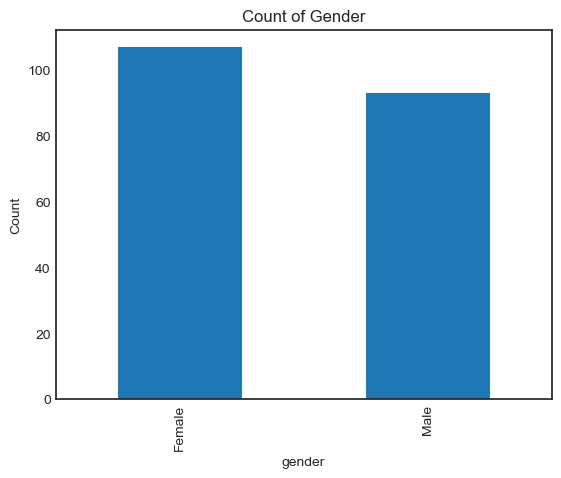

In [123]:
# Matplotlib

# sns.barplot(
#     x='gender', 
#     y='price', 
#     df_4=df_4, 
#     color='blue');

# plt.bar(df_4['gender'] align='center', alpha=0.5)
# plt.xticks(gender, subject)
counts = df_4['gender'].value_counts()

counts.plot(kind='bar')

plt.title('Count of Gender')
# plt.xlabel('Department')
plt.ylabel('Count')
plt.show()

In [124]:
# Analyzing adoption trends by species, breed, or location
# No of color?

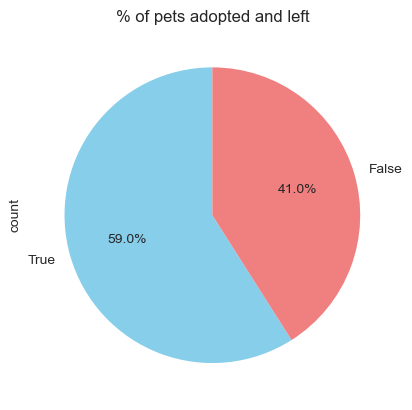

In [125]:
adopted = df_4['adopted'].value_counts()

adopted.plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('% of pets adopted and left')

plt.show()

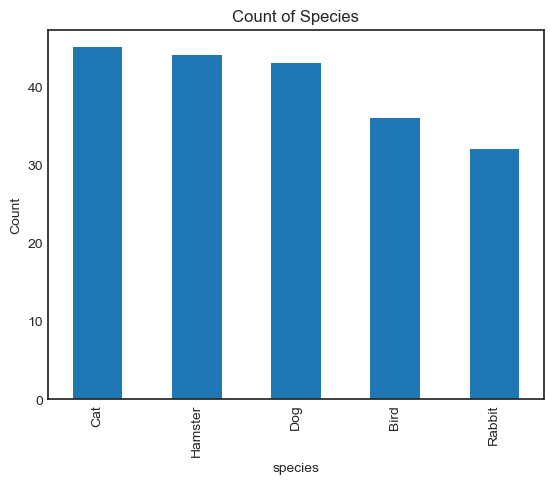

In [126]:
# Highest occuring species
counts = df_4['species'].value_counts()

counts.plot(kind='bar')

plt.title('Count of Species')
# plt.xlabel('Department')
plt.ylabel('Count')
plt.show()

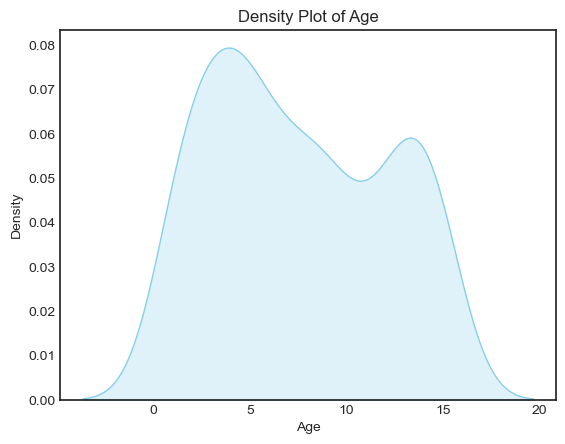

In [127]:
# plt.style.use('seaborn-v0_8-white')
# hdata = df_4['age_years']
# # hdata
# plt.hist(hdata);
sns.kdeplot(data=df_4, x="age_years", fill=True, color="skyblue")

plt.title("Density Plot of Age")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()

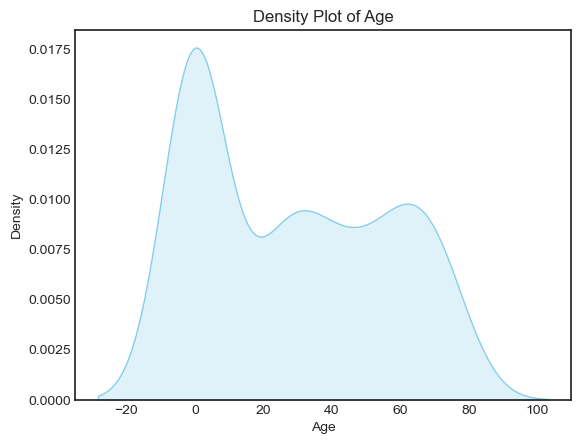

In [128]:
sns.kdeplot(data=df_4, x="adopter_age", fill=True, color="skyblue")

plt.title("Density Plot of Age")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()

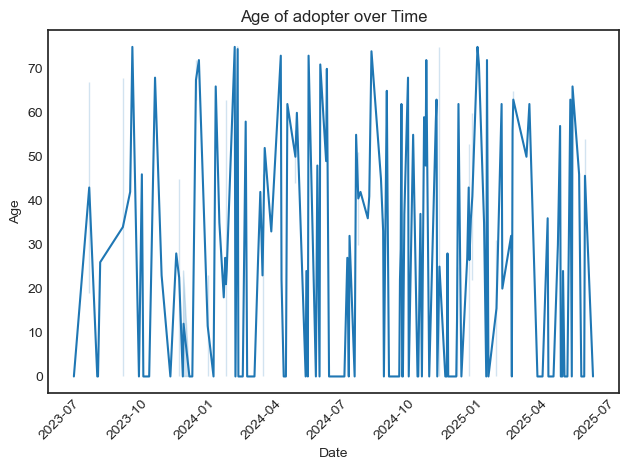

In [129]:
# Check if date is important against anything

sns.lineplot(data=df_4, x="adoption_date", y="adopter_age")
plt.title("Age of adopter over Time")
plt.xlabel("Date")
plt.ylabel("Age")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

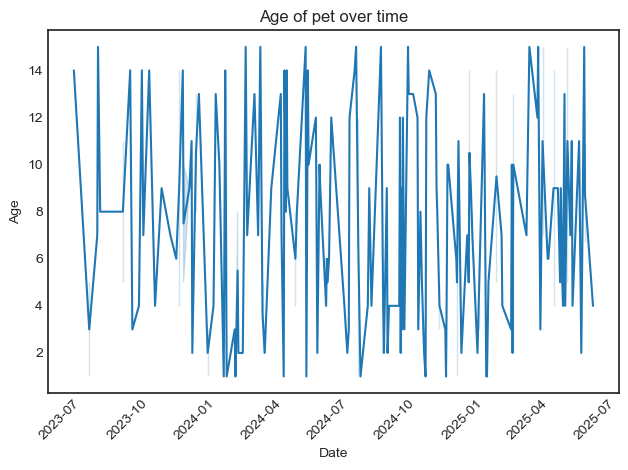

In [130]:
sns.lineplot(data=df_4, x="adoption_date", y="age_years")
plt.title("Age of pet over time")
plt.xlabel("Date")
plt.ylabel("Age")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Date, no use

In [131]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   pet_id                 200 non-null    object        
 1   pet_name               200 non-null    object        
 2   species                200 non-null    object        
 3   breed                  200 non-null    object        
 4   age_years              200 non-null    int64         
 5   gender                 200 non-null    object        
 6   color                  200 non-null    object        
 7   arrival_date           200 non-null    datetime64[ns]
 8   adopted                200 non-null    bool          
 9   adoption_date          200 non-null    datetime64[ns]
 10  adopter_id             200 non-null    object        
 11  adopter_name           200 non-null    object        
 12  adopter_age            200 non-null    int64         
 13  adopter_ci

In [132]:
# Drop pet_id
# Pet_name: High cardinality
# breed: mid cardinality
# date: convert to datetime
# adopter_id?
# adopter_name: high card
# adopter_city: high card

df_4['adopter_city'].value_counts()[0:5]
# df_4['color'].unique()

adopter_city
Unknown            82
Christopherview     2
Mcgeestad           1
Baileyshire         1
Romerostad          1
Name: count, dtype: int64

In [133]:
df_4 = df_4.drop(['pet_id', 'adopter_id'], axis='columns')

In [134]:
# apply get_dummies function
# df_4 = pd.get_dummies(df_4[["species","color"]])
# df_4.head()

df_4_encoded = pd.get_dummies(df_4, columns=['color', 'species','gender'])
df_4_encoded.head()
# , sparse=True, dtype=int

,pet_name,breed,age_years,arrival_date,adopted,adoption_date,adopter_name,adopter_age,adopter_city,adopter_previous_pets,...,color_Mixed,color_Spotted,color_White,species_Bird,species_Cat,species_Dog,species_Hamster,species_Rabbit,gender_Female,gender_Male
S/N,,,,,,,,,,,,,,,,,,,,,
1,Sandra,Yorkshire Terrier,2,2024-10-10,True,2025-03-11,Megan Rogers,56,Mcgeestad,1,...,False,False,True,False,False,True,False,False,True,False
2,Brian,Tonkinese,1,2023-09-09,True,2024-02-10,Jonathan Hawkins,18,Geneshire,2,...,False,False,False,False,True,False,False,False,True,False
3,Timothy,Amazon Parrot,4,2023-10-03,False,2023-10-17,Unknown,0,Unknown,0,...,False,True,False,True,False,False,False,False,False,True
4,Karl,German Shepherd,1,2024-07-28,True,2024-08-12,Natalie Rivera,51,North Richard,3,...,False,False,True,False,False,True,False,False,True,False
5,Sarah,Dutch,1,2024-02-21,False,2024-02-26,Unknown,0,Unknown,0,...,False,True,False,False,False,False,False,True,True,False


In [135]:
df_4_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   pet_name               200 non-null    object        
 1   breed                  200 non-null    object        
 2   age_years              200 non-null    int64         
 3   arrival_date           200 non-null    datetime64[ns]
 4   adopted                200 non-null    bool          
 5   adoption_date          200 non-null    datetime64[ns]
 6   adopter_name           200 non-null    object        
 7   adopter_age            200 non-null    int64         
 8   adopter_city           200 non-null    object        
 9   adopter_previous_pets  200 non-null    int64         
 10  S/N                    200 non-null    int32         
 11  color_Black            200 non-null    bool          
 12  color_Brown            200 non-null    bool          
 13  color_Gold

In [136]:
# data = ['Red', 'Green', 'Blue', 'Red', 'Red']
# series_data = pd.Series(data)
frequency_encoding = df_4_encoded['breed'].value_counts()

# Encode the data by replacing categories with their frequency counts
encoded_data = [frequency_encoding[x] for x in df_4_encoded['breed']]
print("Encoded Data:", encoded_data)

Encoded Data: [3, 1, 5, 3, 6, 3, 4, 3, 1, 4, 5, 5, 5, 6, 3, 2, 7, 5, 7, 8, 5, 3, 4, 5, 2, 6, 3, 2, 5, 3, 8, 4, 5, 3, 4, 3, 5, 4, 7, 6, 4, 7, 4, 7, 8, 1, 6, 2, 3, 4, 5, 5, 1, 4, 2, 3, 6, 4, 2, 7, 7, 2, 7, 5, 4, 2, 5, 7, 5, 6, 2, 8, 1, 6, 4, 3, 3, 5, 6, 4, 7, 6, 6, 8, 2, 3, 4, 2, 3, 7, 4, 7, 3, 2, 3, 6, 8, 4, 5, 4, 1, 8, 7, 3, 2, 5, 8, 5, 7, 8, 4, 6, 2, 6, 4, 2, 3, 8, 4, 6, 6, 5, 3, 6, 5, 7, 3, 6, 4, 6, 4, 2, 4, 6, 8, 2, 1, 5, 2, 4, 2, 4, 3, 4, 6, 8, 2, 7, 2, 5, 2, 6, 4, 7, 6, 6, 7, 4, 1, 5, 8, 3, 3, 7, 2, 3, 7, 5, 4, 7, 1, 5, 8, 5, 6, 4, 2, 2, 5, 6, 4, 5, 6, 6, 4, 4, 6, 2, 4, 3, 3, 8, 3, 4, 8, 5, 3, 2, 6, 2]


In [137]:
# pet_name, adopter name,adopter_city - binary or label encoder?
df_4_encoded['breed'] = encoded_data

In [138]:
# y_encode=LabelEncoder().fit_transform(y_data)

In [139]:
le = LabelEncoder()
df_4_encoded['encoded_pet_name'] = le.fit_transform(df_4_encoded['pet_name'])
df_4_encoded['encoded_adopter_name'] = le.fit_transform(df_4_encoded['adopter_name'])
df_4_encoded['encoded_adopter_city'] = le.fit_transform(df_4_encoded['adopter_city'])

In [140]:
df_4_encoded.head()

,pet_name,breed,age_years,arrival_date,adopted,adoption_date,adopter_name,adopter_age,adopter_city,adopter_previous_pets,...,species_Bird,species_Cat,species_Dog,species_Hamster,species_Rabbit,gender_Female,gender_Male,encoded_pet_name,encoded_adopter_name,encoded_adopter_city
S/N,,,,,,,,,,,,,,,,,,,,,
1,Sandra,3,2,2024-10-10,True,2025-03-11,Megan Rogers,56,Mcgeestad,1,...,False,False,True,False,False,True,False,120,76,56
2,Brian,1,1,2023-09-09,True,2024-02-10,Jonathan Hawkins,18,Geneshire,2,...,False,True,False,False,False,True,False,19,50,30
3,Timothy,5,4,2023-10-03,False,2023-10-17,Unknown,0,Unknown,0,...,True,False,False,False,False,False,True,130,112,107
4,Karl,3,1,2024-07-28,True,2024-08-12,Natalie Rivera,51,North Richard,3,...,False,False,True,False,False,True,False,76,85,79
5,Sarah,6,1,2024-02-21,False,2024-02-26,Unknown,0,Unknown,0,...,False,False,False,False,True,True,False,121,112,107


In [141]:
df_4_encoded = df_4_encoded.drop(["pet_name", 'adopter_name', 'adopter_city', 'S/N'], axis='columns')
df_4_encoded.head()

,breed,age_years,arrival_date,adopted,adoption_date,adopter_age,adopter_previous_pets,color_Black,color_Brown,color_Golden,...,species_Bird,species_Cat,species_Dog,species_Hamster,species_Rabbit,gender_Female,gender_Male,encoded_pet_name,encoded_adopter_name,encoded_adopter_city
S/N,,,,,,,,,,,,,,,,,,,,,
1,3,2,2024-10-10,True,2025-03-11,56,1,False,False,False,...,False,False,True,False,False,True,False,120,76,56
2,1,1,2023-09-09,True,2024-02-10,18,2,False,False,True,...,False,True,False,False,False,True,False,19,50,30
3,5,4,2023-10-03,False,2023-10-17,0,0,False,False,False,...,True,False,False,False,False,False,True,130,112,107
4,3,1,2024-07-28,True,2024-08-12,51,3,False,False,False,...,False,False,True,False,False,True,False,76,85,79
5,6,1,2024-02-21,False,2024-02-26,0,0,False,False,False,...,False,False,False,False,True,True,False,121,112,107


In [142]:
df_4_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   breed                  200 non-null    int64         
 1   age_years              200 non-null    int64         
 2   arrival_date           200 non-null    datetime64[ns]
 3   adopted                200 non-null    bool          
 4   adoption_date          200 non-null    datetime64[ns]
 5   adopter_age            200 non-null    int64         
 6   adopter_previous_pets  200 non-null    int64         
 7   color_Black            200 non-null    bool          
 8   color_Brown            200 non-null    bool          
 9   color_Golden           200 non-null    bool          
 10  color_Grey             200 non-null    bool          
 11  color_Mixed            200 non-null    bool          
 12  color_Spotted          200 non-null    bool          
 13  color_Whit

In [147]:
df_4_encoded = df_4_encoded.drop(['arrival_date', 'adoption_date'], axis=1)
df_4_encoded.head()

,breed,age_years,adopted,adopter_age,adopter_previous_pets,color_Black,color_Brown,color_Golden,color_Grey,color_Mixed,...,species_Bird,species_Cat,species_Dog,species_Hamster,species_Rabbit,gender_Female,gender_Male,encoded_pet_name,encoded_adopter_name,encoded_adopter_city
S/N,,,,,,,,,,,,,,,,,,,,,
1,3,2,True,56,1,False,False,False,False,False,...,False,False,True,False,False,True,False,120,76,56
2,1,1,True,18,2,False,False,True,False,False,...,False,True,False,False,False,True,False,19,50,30
3,5,4,False,0,0,False,False,False,False,False,...,True,False,False,False,False,False,True,130,112,107
4,3,1,True,51,3,False,False,False,False,False,...,False,False,True,False,False,True,False,76,85,79
5,6,1,False,0,0,False,False,False,False,False,...,False,False,False,False,True,True,False,121,112,107


In [148]:
df_4_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   breed                  200 non-null    int64
 1   age_years              200 non-null    int64
 2   adopted                200 non-null    bool 
 3   adopter_age            200 non-null    int64
 4   adopter_previous_pets  200 non-null    int64
 5   color_Black            200 non-null    bool 
 6   color_Brown            200 non-null    bool 
 7   color_Golden           200 non-null    bool 
 8   color_Grey             200 non-null    bool 
 9   color_Mixed            200 non-null    bool 
 10  color_Spotted          200 non-null    bool 
 11  color_White            200 non-null    bool 
 12  species_Bird           200 non-null    bool 
 13  species_Cat            200 non-null    bool 
 14  species_Dog            200 non-null    bool 
 15  species_Hamster        200 non-null    bool 


In [ ]:
# model and feature selection
# PCA

In [50]:
# For high cardinality columns
# from sklearn.pipeline import Pipeline
# from sklearn.linear_model import LinearRegression
# from sklearn.feature_extraction import FeatureHasher

# pipeline = Pipeline(steps=[
#     ('preprocess', preprocessor),
#     ('model', LinearRegression())
# ])

# hasher = FeatureHasher(n_features=20, input_type='string')
# df_4 = hasher.transform(df_4[['pet_name', 'breed', 'adopter_name', 'adopter_city']].astype(str))
# df_4.head()

In [149]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier

# param_grid = {
#     'n_estimators': [100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5]
# }

# grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
# grid.fit(X_train, y_train)

# print("Best parameters:", grid.best_params_)
# print("Best score:", grid.best_score_)

NameError: name 'X_train' is not defined